In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
data  = pd.read_csv("../result/top-daily-vn-final.csv")
# data 

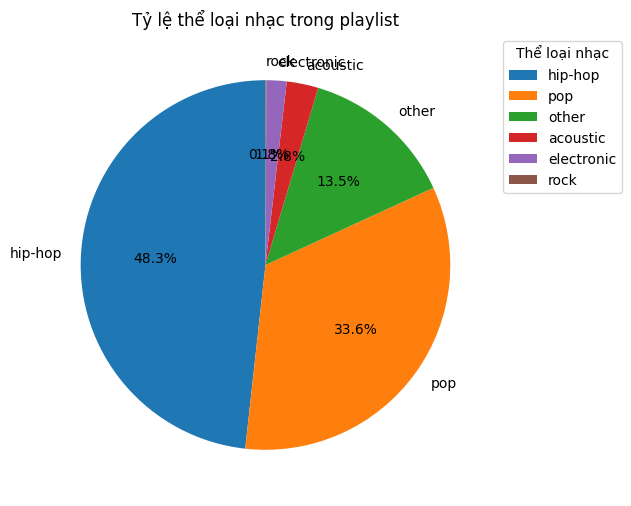

In [39]:
# 1. Biểu đồ phân phối thể loại nhạc
plt.figure(figsize=(10, 6))
data['song_genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ thể loại nhạc trong playlist')
plt.legend(title='Thể loại nhạc', loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('')
plt.show()



In [40]:
# Tính số lượng bài hát theo thể loại
genre_counts = data['song_genre'].value_counts()

# Tính tỷ lệ phần trăm
genre_percentage = (genre_counts / genre_counts.sum()) * 100

# In kết quả
print("Tỷ lệ phần trăm từng thể loại nhạc:")
for genre, percentage in genre_percentage.items():
    print(f"{genre}: {percentage:.2f}%")

Tỷ lệ phần trăm từng thể loại nhạc:
hip-hop: 48.25%
pop: 33.61%
other: 13.54%
acoustic: 2.77%
electronic: 1.76%
rock: 0.08%


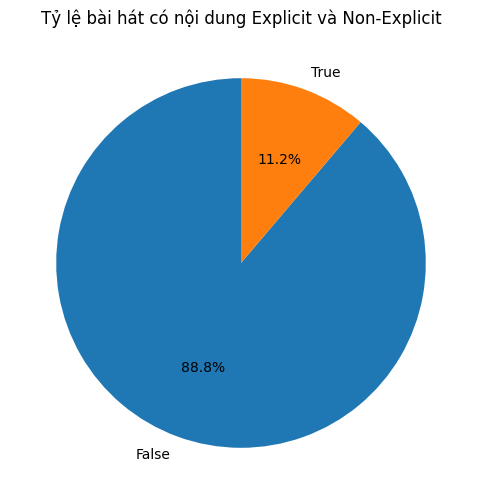

In [41]:
# 3. Phân tích số lượng bài hát Explicit vs. Non-Explicit
plt.figure(figsize=(6, 6))
data['is_explicit'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ bài hát có nội dung Explicit và Non-Explicit')
plt.ylabel('')
plt.show()

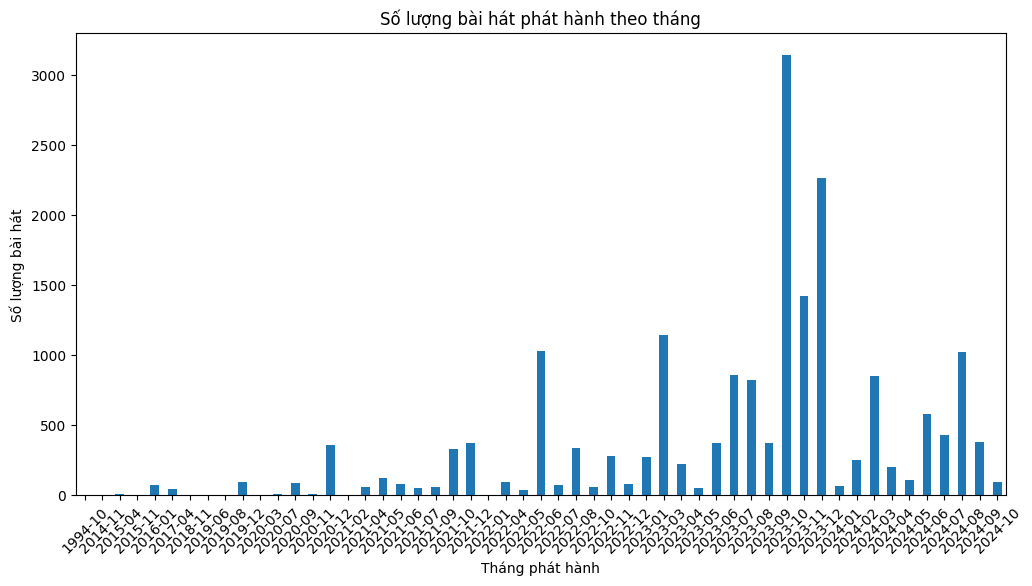

In [42]:
# 4. Thời gian phát hành album
data['album_release_date'] = pd.to_datetime(data['album_release_date'])
data['release_month'] = data['album_release_date'].dt.to_period('M')

plt.figure(figsize=(12, 6))
release_counts = data['release_month'].value_counts().sort_index()
release_counts.plot.bar()
plt.title('Số lượng bài hát phát hành theo tháng')
plt.xlabel('Tháng phát hành')
plt.ylabel('Số lượng bài hát')
plt.xticks(rotation=45)
plt.show()

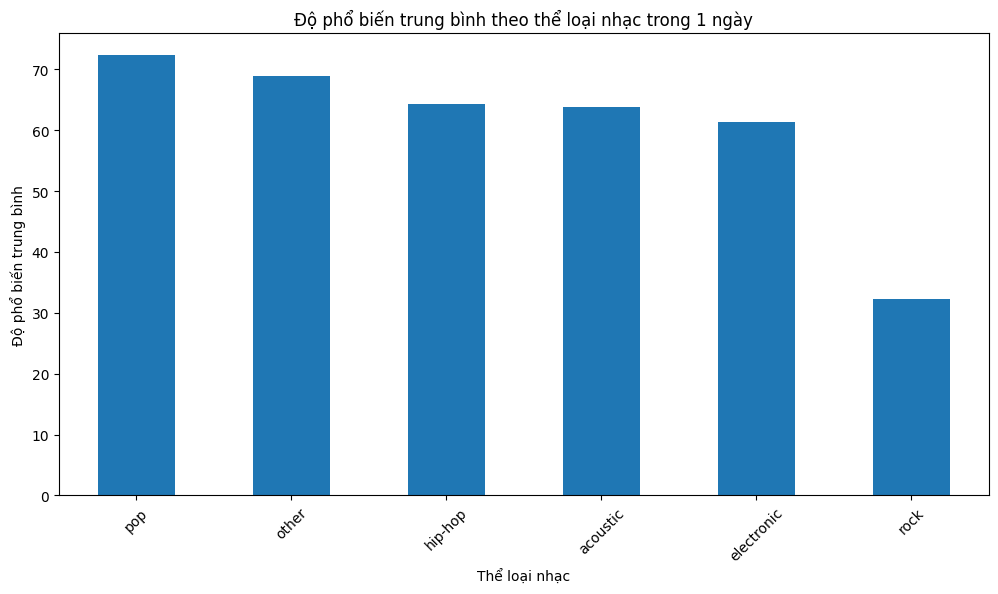

In [43]:
# 4. Độ phổ biến trung bình theo thể loại nhạc trong 1 ngày
# Tính độ phổ biến trung bình theo thể loại nhạc
avg_popularity_by_genre_daily = data.groupby('song_genre')['popularity'].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
avg_popularity_by_genre_daily.plot.bar()
plt.title('Độ phổ biến trung bình theo thể loại nhạc trong 1 ngày')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Độ phổ biến trung bình')
plt.xticks(rotation=45)
plt.show()

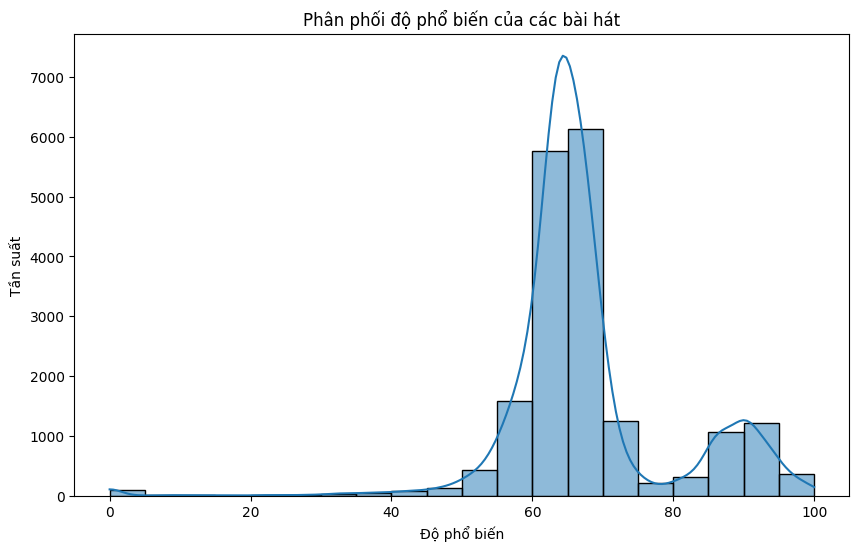

In [44]:
# 1. Phân phối độ phổ biến của các bài hát
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=20, kde=True)
plt.title('Phân phối độ phổ biến của các bài hát')
plt.xlabel('Độ phổ biến')
plt.ylabel('Tần suất')
plt.show()

In [74]:
import plotly.graph_objects as go

# Tính toán tổng số bài hát cho từng thể loại và độ phổ biến
genre_popularity = data.groupby(['song_genre', 'popularity']).size().reset_index(name='count')

# Chuyển đổi dữ liệu để phù hợp với biểu đồ stack
genre_pivot = genre_popularity.pivot_table(index='popularity', columns='song_genre', values='count', fill_value=0)

# Vẽ biểu đồ cột stack
fig = go.Figure()
for genre in genre_pivot.columns:
    fig.add_trace(go.Bar(
        x=genre_pivot.index,
        y=genre_pivot[genre],
        name=genre
    ))

fig.update_layout(
    title='Phân phối độ phổ biến của các bài hát theo thể loại',
    xaxis_title='Độ phổ biến',
    yaxis_title='Số lượng bài hát',
    barmode='stack',
    height=600
)

fig.show()

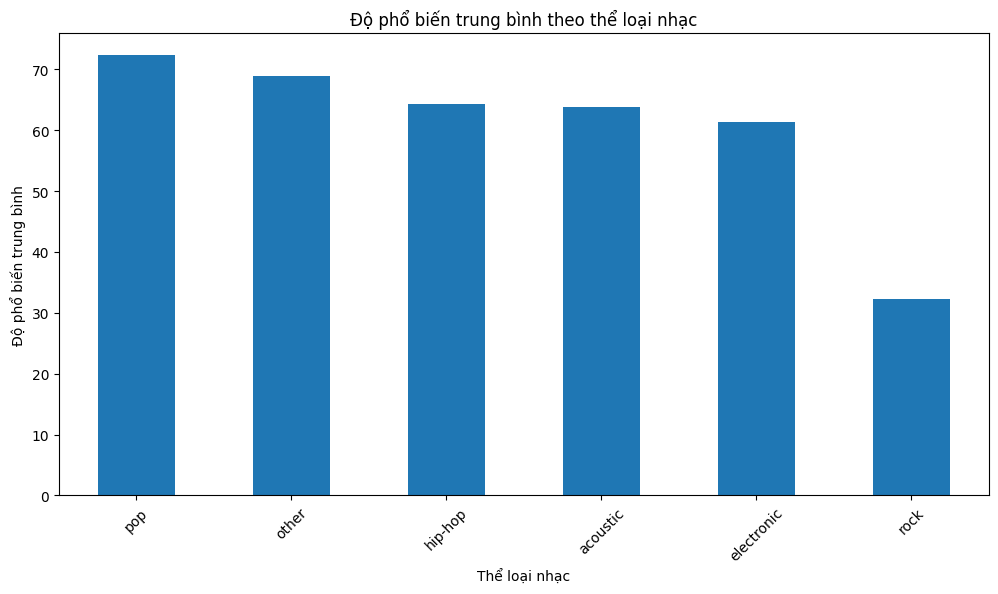

In [45]:
# 2. Độ phổ biến trung bình theo thể loại nhạc
plt.figure(figsize=(12, 6))
avg_popularity_by_genre = data.groupby('song_genre')['popularity'].mean().sort_values(ascending=False)
avg_popularity_by_genre.plot.bar()
plt.title('Độ phổ biến trung bình theo thể loại nhạc')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Độ phổ biến trung bình')
plt.xticks(rotation=45)
plt.show()

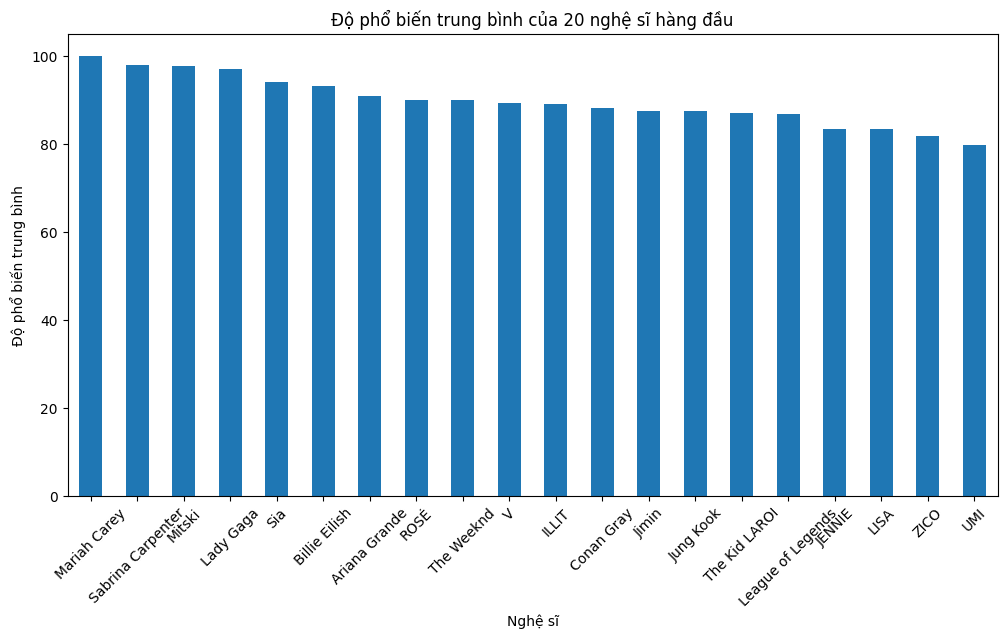

In [46]:
# 4. Độ phổ biến trung bình của 20 nghệ sĩ hàng đầu
plt.figure(figsize=(12, 6))
top_artists = data.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(20)
top_artists.plot.bar()
plt.title('Độ phổ biến trung bình của 20 nghệ sĩ hàng đầu')
plt.xlabel('Nghệ sĩ')
plt.ylabel('Độ phổ biến trung bình')
plt.xticks(rotation=45)
plt.show()

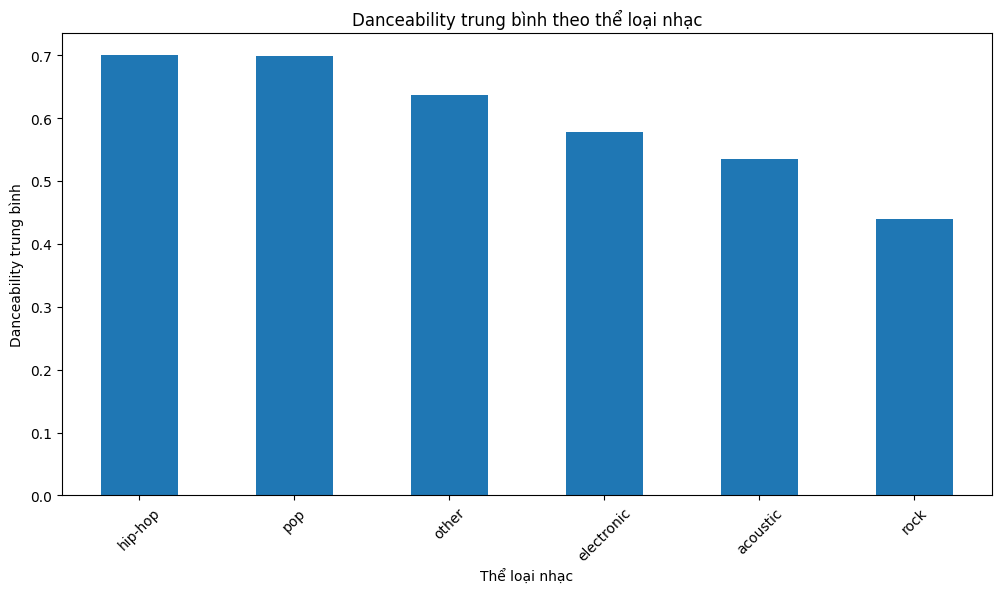

In [47]:
# Tính danceability trung bình theo thể loại nhạc
avg_danceability_by_genre = data.groupby('song_genre')['danceability'].mean().sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
avg_danceability_by_genre.plot.bar()
plt.title('Danceability trung bình theo thể loại nhạc')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Danceability trung bình')
plt.xticks(rotation=45)
plt.show()

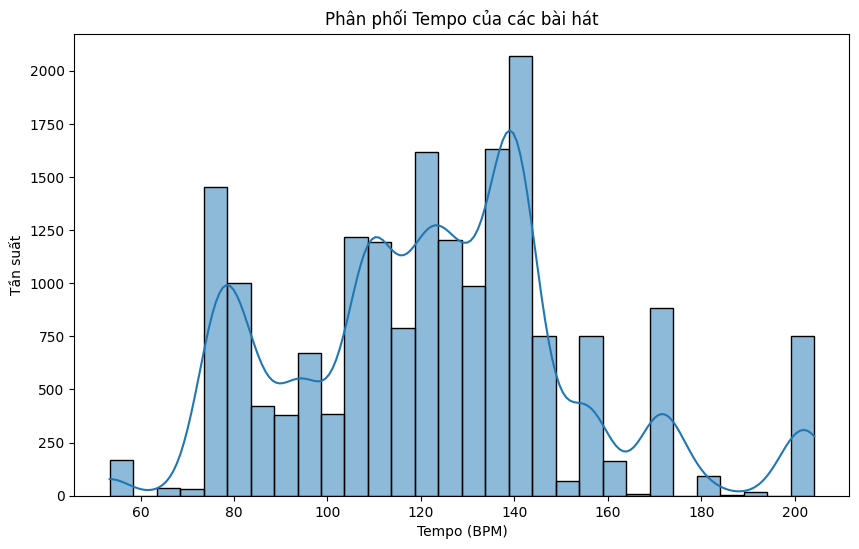

In [48]:
# Phân phối tempo của các bài hát
plt.figure(figsize=(10, 6))
sns.histplot(data['tempo'], bins=30, kde=True)
plt.title('Phân phối Tempo của các bài hát')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Tần suất')
plt.show()

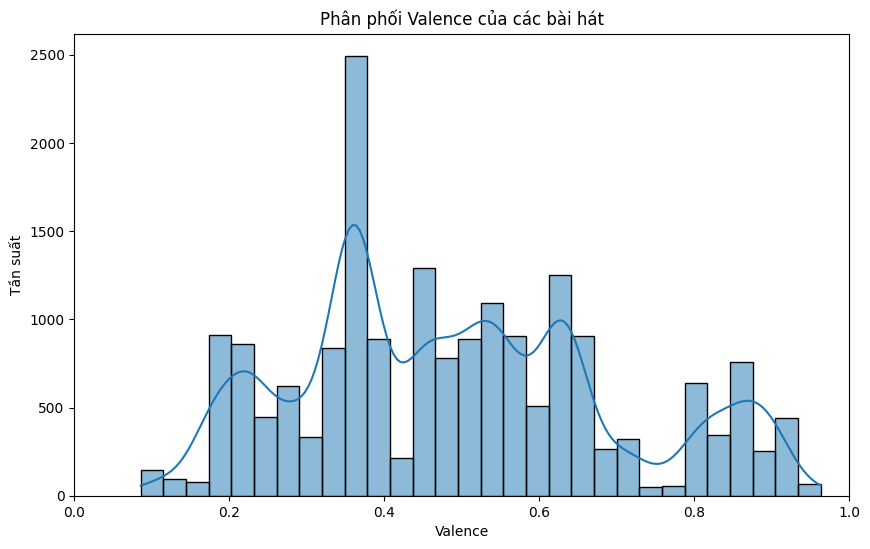

In [49]:
# Phân phối valence của các bài hát
plt.figure(figsize=(10, 6))
sns.histplot(data['valence'], bins=30, kde=True)
plt.title('Phân phối Valence của các bài hát')
plt.xlabel('Valence')
plt.ylabel('Tần suất')
plt.xlim(0, 1)  # Valence thường nằm trong khoảng từ 0 đến 1
plt.show()

valence
số [float]
Một phép đo từ 0,0 đến 1,0 mô tả tính tích cực về mặt âm nhạc được truyền tải bởi một bản nhạc. Các bản nhạc có valence cao nghe có vẻ tích cực hơn (ví dụ: vui vẻ, phấn khởi, hưng phấn), trong khi các bản nhạc có valence thấp nghe có vẻ tiêu cực hơn (ví dụ: buồn, chán nản, tức giận).

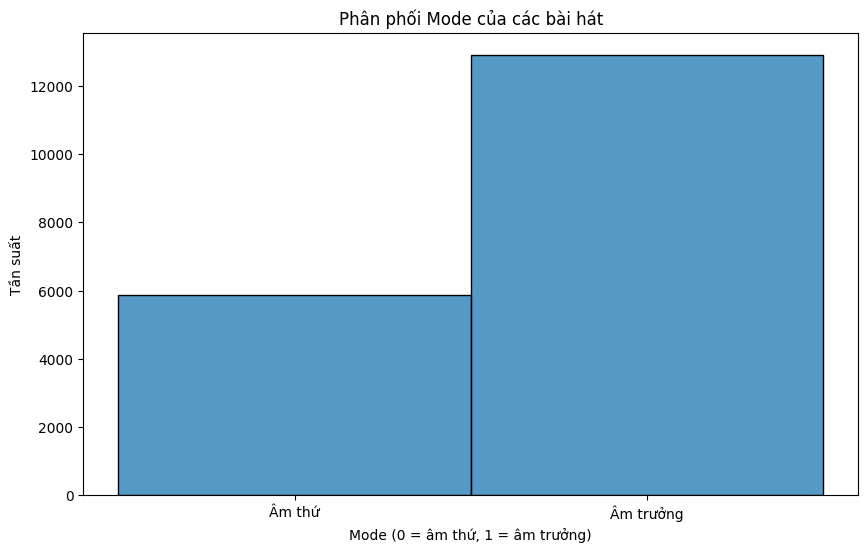

In [50]:
# Phân phối mode của các bài hát
plt.figure(figsize=(10, 6))
sns.histplot(data['mode'], bins=2, discrete=True, kde=False)  # Chỉ có 2 giá trị (0 và 1)
plt.title('Phân phối Mode của các bài hát')
plt.xlabel('Mode (0 = âm thứ, 1 = âm trưởng)')
plt.ylabel('Tần suất')
plt.xticks([0, 1], ['Âm thứ', 'Âm trưởng'])  # Đặt nhãn cho trục x
plt.show()

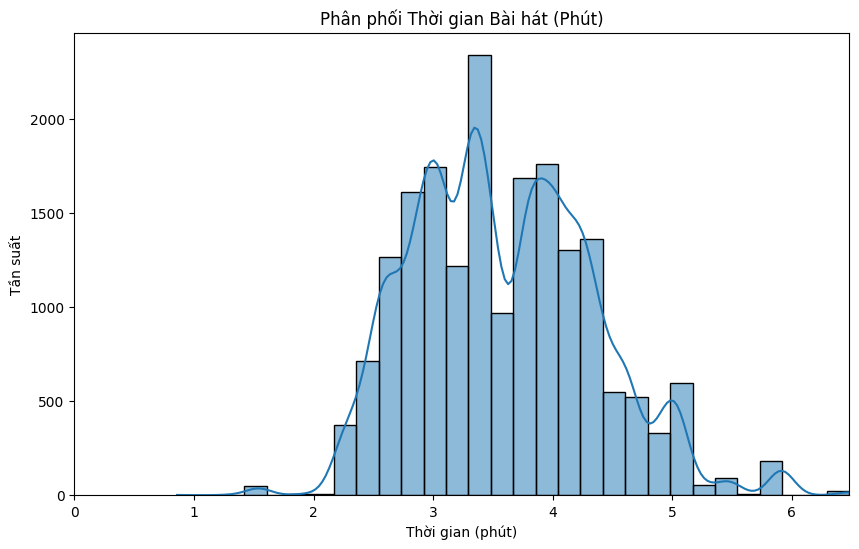

In [51]:
# Chuyển đổi duration_ms sang phút
data['duration_minutes'] = data['duration_ms'] / 60000

# Vẽ biểu đồ phân phối thời gian bài hát
plt.figure(figsize=(10, 6))
sns.histplot(data['duration_minutes'], bins=30, kde=True)
plt.title('Phân phối Thời gian Bài hát (Phút)')
plt.xlabel('Thời gian (phút)')
plt.ylabel('Tần suất')
plt.xlim(0, data['duration_minutes'].max())  # Đặt giới hạn trục x
plt.show()

In [52]:
# Lọc ra những bài nhạc có daily_movement = 0
zero_movement_songs = data[data['daily_movement'] == 0]

# Đếm số lần xuất hiện của mỗi song_id và name
song_counts = zero_movement_songs.groupby(['spotify_id', 'name']).size().reset_index(name='count')

# Sắp xếp theo số lần xuất hiện từ cao xuống thấp
top_zero_movement_songs = song_counts.sort_values(by='count', ascending=False)

# Lấy ra nghệ sĩ và thể loại tương ứng với các bài nhạc đó
top_zero_movement_songs = top_zero_movement_songs.merge(data[['spotify_id', 'artists', 'song_genre']], on='spotify_id', how='left')

# Loại bỏ các bản sao
top_zero_movement_songs = top_zero_movement_songs.drop_duplicates(subset=['spotify_id', 'name'])

# In kết quả
print("Những bài nhạc có daily_movement = 0 xuất hiện nhiều nhất:")
top_zero_movement_songs[['spotify_id', 'name', 'count', 'artists', 'song_genre']]

Những bài nhạc có daily_movement = 0 xuất hiện nhiều nhất:


,spotify_id,name,count,artists,song_genre
0,2HRgqmZQC0MC7GeNuDIXHN,Seven (feat. Latto) (Explicit Ver.),235,Jung Kook,pop
357,2KslE17cAJNHTsI2MI0jb2,Standing Next to You,217,Jung Kook,pop
713,2N0SPREDYqILVEFSsWF5N5,Love Me Again,104,V,other
1088,1bG6Q8sR8jda7ryI365y8o,Những Lời Hứa Bỏ Quên,101,Vũ.,acoustic
1372,4qYfRfSxsmhJ1WMaywtLyI,Từng Quen,101,Wren Evans,hip-hop
...,...,...,...,...,...
18694,2dPJtlvoa3GDowCh035M8P,Nếu Những Tiếc Nuối,1,Vũ.,acoustic
18707,59hBR0BCtJsfIbV9VzCVAp,Set Me Free Pt.2,1,Jimin,pop
18714,3hqOrxH5qPlvrApcb7Ac8c,Lan Man,1,Ronboogz,other
18715,7AbqgE05nFl9qY4FRUiq2p,Shot Glass of Tears,1,Jung Kook,pop


In [53]:
# Đếm số lần mỗi nghệ sĩ xuất hiện và sắp xếp theo số lần xuất hiện
artist_counts = top_zero_movement_songs['artists'].value_counts().reset_index()
artist_counts.columns = ['artists', 'count']

# Sắp xếp theo số lần xuất hiện từ cao xuống thấp
artist_counts = artist_counts.sort_values(by='count', ascending=False)

# In danh sách nghệ sĩ và số lần xuất hiện
print("Danh sách nghệ sĩ và số lần xuất hiện (sắp xếp):")
artist_counts

Danh sách nghệ sĩ và số lần xuất hiện (sắp xếp):


,artists,count
0,"ANH TRAI ""SAY HI""",26
1,Wren Evans,13
2,Jung Kook,12
3,HIEUTHUHAI,11
4,Sơn Tùng M-TP,8
...,...,...
60,Mitski,1
61,Megan Thee Stallion,1
62,ZICO,1
63,Lãng,1


In [54]:
artist_counts.head(20)

,artists,count
0,"ANH TRAI ""SAY HI""",26
1,Wren Evans,13
2,Jung Kook,12
3,HIEUTHUHAI,11
4,Sơn Tùng M-TP,8
5,Jimin,8
6,GREY D,7
7,tlinh,6
8,Vũ.,6
9,RPT MCK,5



Phân phối thể loại nhạc:
   song_genre  count
0     hip-hop     96
1         pop     80
2       other     43
3    acoustic      8
4  electronic      4


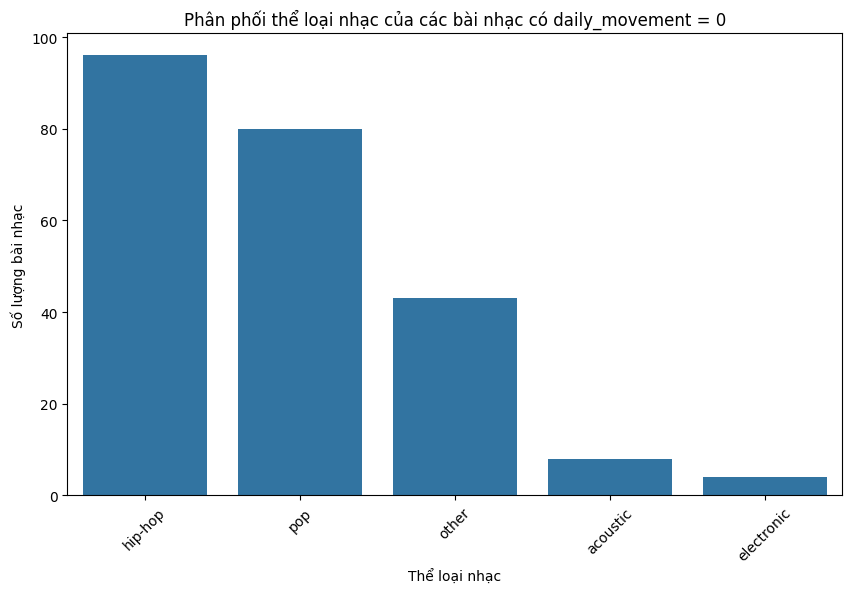

In [55]:
# Tính phân phối thể loại nhạc từ top_zero_movement_songs
genre_distribution = top_zero_movement_songs['song_genre'].value_counts().reset_index()
genre_distribution.columns = ['song_genre', 'count']

# In phân phối thể loại
print("\nPhân phối thể loại nhạc:")
print(genre_distribution)

# Vẽ biểu đồ phân phối thể loại nhạc
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_distribution, x='song_genre', y='count')
plt.title('Phân phối thể loại nhạc của các bài nhạc có daily_movement = 0')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Số lượng bài nhạc')
plt.xticks(rotation=45)
plt.show()

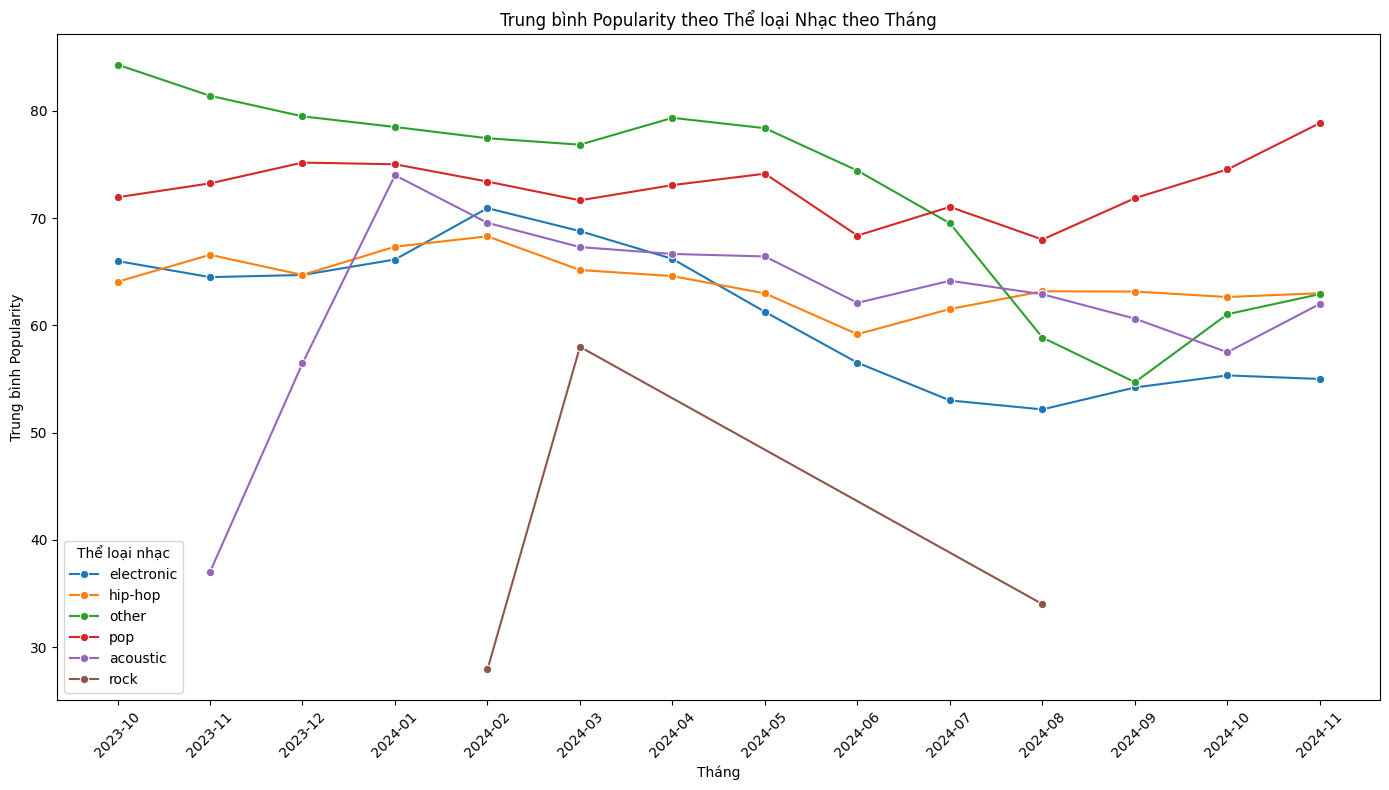

In [56]:
# 1. Chuyển đổi snapshot_date thành định dạng tháng
data['snapshot_date'] = pd.to_datetime(data['snapshot_date'])
data['month'] = data['snapshot_date'].dt.to_period('M').astype(str)  # Chuyển đổi thành chuỗi

# 2. Nhóm dữ liệu theo tháng và song_genre, tính trung bình popularity
average_popularity_monthly = data.groupby(['month', 'song_genre'])['popularity'].mean().reset_index()

# 3. Đảm bảo rằng cột popularity là kiểu số
average_popularity_monthly['popularity'] = pd.to_numeric(average_popularity_monthly['popularity'], errors='coerce')

# 4. Vẽ biểu đồ đường với seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_popularity_monthly, x='month', y='popularity', hue='song_genre', marker='o')

plt.title('Trung bình Popularity theo Thể loại Nhạc theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Trung bình Popularity')
plt.xticks(rotation=45)
plt.legend(title='Thể loại nhạc')
plt.tight_layout()
plt.show()

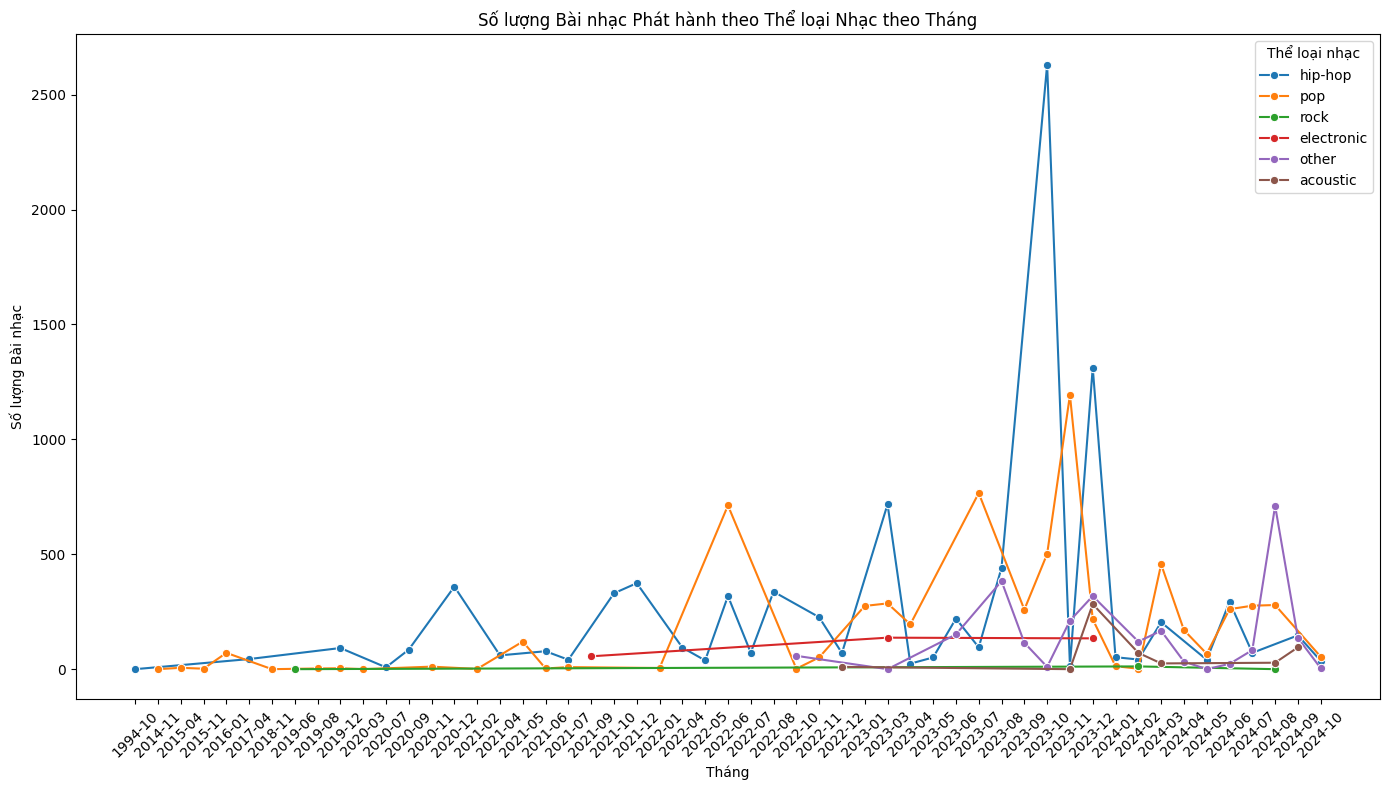

In [57]:
# 1. Chuyển đổi album_release_date thành định dạng tháng
data['album_release_date'] = pd.to_datetime(data['album_release_date'])
data['release_month'] = data['album_release_date'].dt.to_period('M').astype(str)  # Chuyển đổi thành chuỗi

# 2. Nhóm dữ liệu theo tháng và song_genre, đếm số lượng bài nhạc
release_counts_monthly = data.groupby(['release_month', 'song_genre']).size().reset_index(name='count')

# 3. Vẽ biểu đồ đường với seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=release_counts_monthly, x='release_month', y='count', hue='song_genre', marker='o')

plt.title('Số lượng Bài nhạc Phát hành theo Thể loại Nhạc theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng Bài nhạc')
plt.xticks(rotation=45)
plt.legend(title='Thể loại nhạc')
plt.tight_layout()
plt.show()

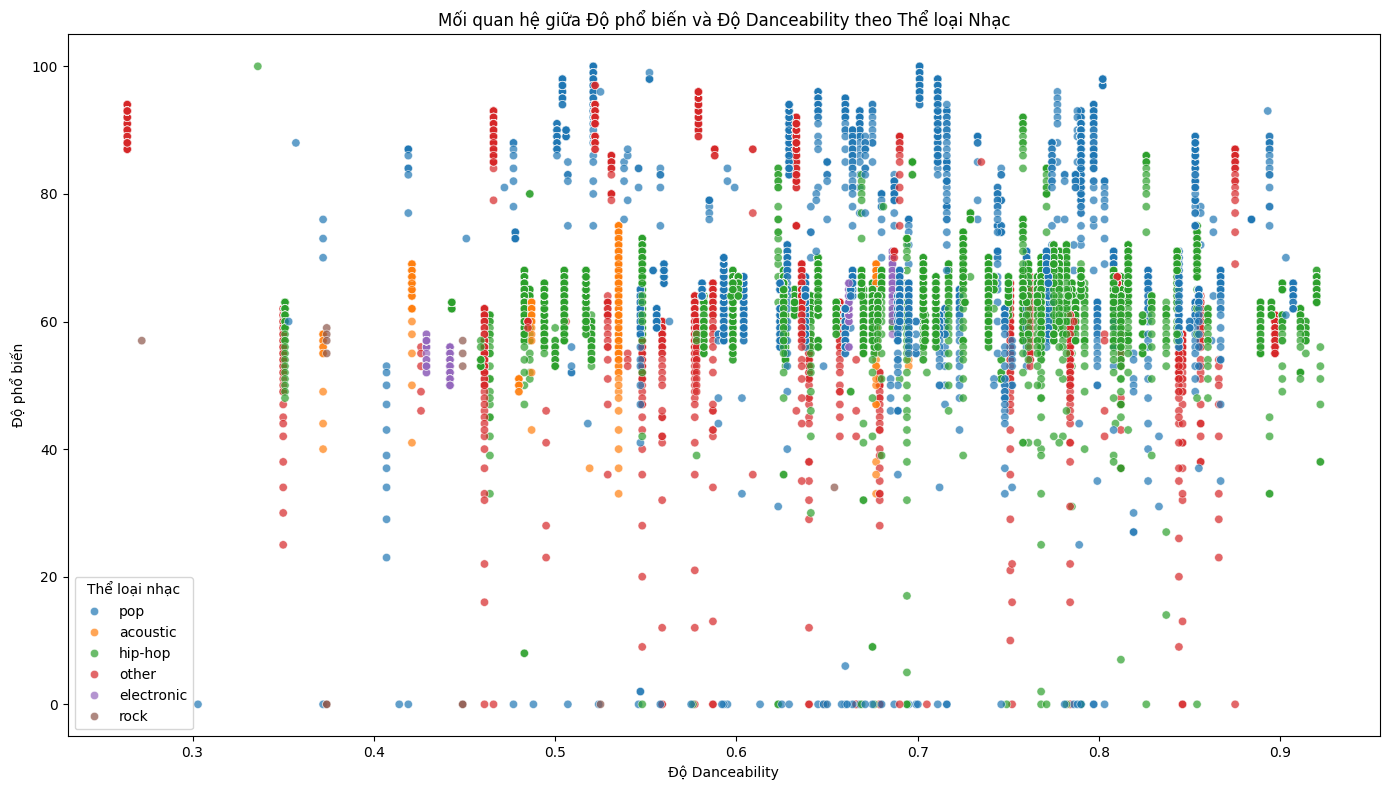

In [58]:
# Mối quan hệ giữa độ phổ biến và độ danceability theo thể loại nhạc
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='danceability', y='popularity', hue='song_genre', alpha=0.7)

plt.title('Mối quan hệ giữa Độ phổ biến và Độ Danceability theo Thể loại Nhạc')
plt.xlabel('Độ Danceability')
plt.ylabel('Độ phổ biến')
plt.legend(title='Thể loại nhạc')
plt.tight_layout()
plt.show()

In [68]:
# Chuyển đổi snapshot_date thành kiểu datetime
data['snapshot_date'] = pd.to_datetime(data['snapshot_date'])

# Tính toán thống kê theo song_genre và snapshot_date
genre_stats = data.groupby(['snapshot_date', 'song_genre']).agg(
    average_popularity=('popularity', 'mean'),
    average_daily_rank=('daily_rank', 'mean'),
    song_count=('song_genre', 'size')
).reset_index()

# Định nghĩa màu cho từng thể loại nhạc
color_dict = {
    'pop': '#FF6347',        # Tomato
    'rock': '#8A2BE2',       # BlueViolet
    'hip-hop': '#FFD700',    # Gold
    'reggae': '#32CD32',     # LimeGreen
    'acoustic': '#4682B4',   # SteelBlue
    'electronic': '#00CED1', # DarkTurquoise
    'blues': '#1E90FF',      # DodgerBlue
    'jazz': '#FF69B4',       # HotPink
    'classical': '#708090',   # SlateGray
    'other': '#C0C0C0'
}

# Thêm màu sắc vào DataFrame dựa trên độ phổ biến
genre_stats['color'] = genre_stats['song_genre'].map(color_dict)

# Tính toán độ đậm của màu dựa trên độ phổ biến
max_popularity = genre_stats['average_popularity'].max()
genre_stats['opacity'] = genre_stats['average_popularity'] / max_popularity  # Tính toán độ đậm

# Tạo biểu đồ Bubble Chart
fig = px.scatter(
    genre_stats,
    x='snapshot_date',
    y='average_daily_rank',
    #y='average_popularity',
    size='song_count',
    color='song_genre',
    color_discrete_map=color_dict,
    size_max=60,
    title='Sự thay đổi về hạng mục nhạc theo thời gian',
    labels={
        'average_daily_rank': 'Hạng trung bình hàng ngày',
        'snapshot_date': 'Ngày'
    },    
)

# Cập nhật độ đậm cho các hình tròn
fig.update_traces(marker=dict(opacity=genre_stats['opacity']))

# Thêm thanh kéo cho thời gian
fig.update_xaxes(rangeslider_visible=True)

# Hiện biểu đồ
fig.show()